In [ ]:
# Import required libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')  # Use the correct path if different

# Show first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Column names
print("Columns:\n", df.columns.tolist())

# Dataset info
df.info()

# Count of churned vs not churned customers
print("\nChurn counts:")
print(df['Churn'].value_counts())

Dataset shape: (7043, 21)
Columns:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecur

In [ ]:
# Check for missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Check column data types
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
# First, convert TotalCharges to string so we can use .str.strip()
df['TotalCharges'] = df['TotalCharges'].astype(str)

# Remove rows with blank TotalCharges (i.e., rows that are just space or empty)
df = df[df['TotalCharges'].str.strip() != ''].copy()

# Now convert it safely to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
# Check if the column exists before dropping it
if 'customerID' in df.columns:
  df.drop('customerID', axis=1, inplace=True)
else:
  print("Column 'customerID' not found in DataFrame.")

Column 'customerID' not found in DataFrame.


In [ ]:
# Encode binary columns: Yes/No → 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Encode gender: Female → 1, Male → 0
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

In [ ]:
# One-hot encode columns with more than 2 categories
# The columns 'InternetService', 'Contract', 'PaymentMethod'
# might have been already one-hot encoded in a previous step
# So, we skip them here. If they are not encoded yet,
# remove the if condition and only execute the else block

multi_cat_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

if set(['InternetService', 'Contract', 'PaymentMethod']).issubset(df.columns):
    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
    df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)
else:
    df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

In [5]:
import pandas as pd
#Load the dataset
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


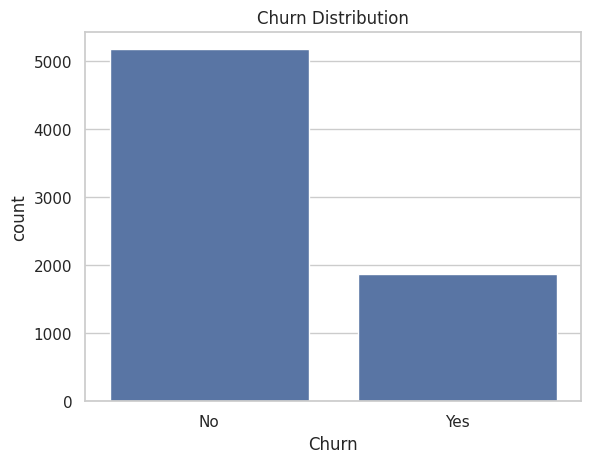

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [7]:
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

# Optional: Percentage
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

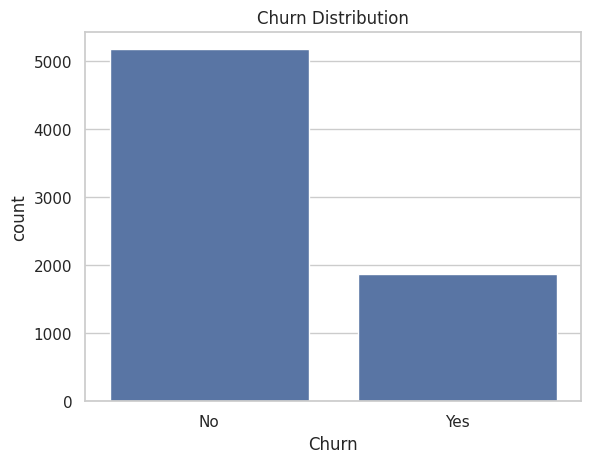

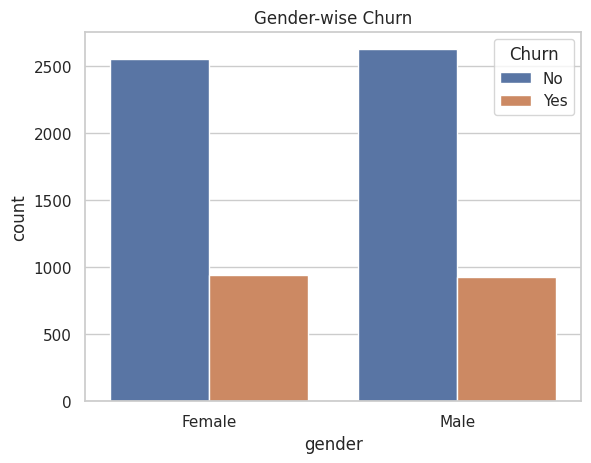

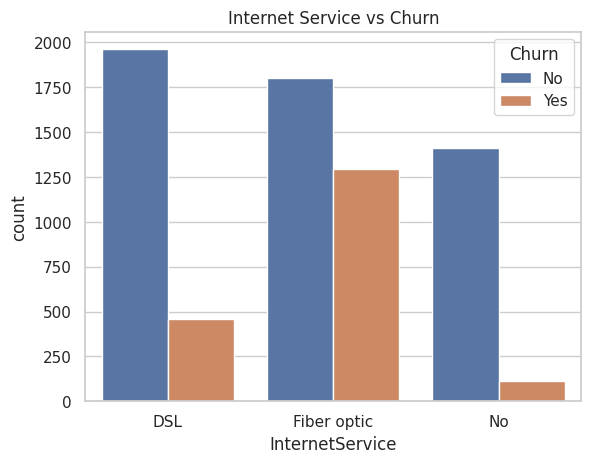

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Churn Distribution
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

# 2. Gender-wise Churn
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Gender-wise Churn')
plt.show()

# 3. Internet Service vs Churn
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Internet Service vs Churn')
plt.show()

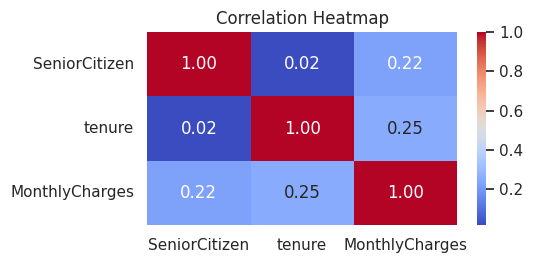

In [11]:
plt.figure(figsize=(5,2.5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Data** **Visualization** **Insights**

**1**. **Churn** **Distribution**

The majority of customers have not churned, while a smaller portion have.

This indicates a class imbalance, which may affect model performance.

We may need to address this later using balancing techniques.


**2**. **Gender**-**wise** **Churn**

Both male and female customers have nearly equal churn rates.

Gender does not significantly influence customer churn.

Therefore, gender may not be a strong predictor of churn.


**3**. **Internet** **Service** **vs** **Churn**

Customers with Fiber optic internet tend to churn more frequently than those with DSL or No internet.

Customers with no internet service have the lowest churn rate.

This suggests internet service type is an important factor in predicting customer churn.bold text

In [12]:
# Step 1: Check data types
print("Before cleaning:")
print(df.dtypes)

# Step 2: Drop unnecessary column
df = df.drop(['customerID'], axis=1)

# Step 3: Convert TotalCharges to numeric and handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Step 4: Encode the target column 'Churn'
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Step 5: One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Final check
print("\nAfter encoding:")
print(df.head())
print("\nData types after encoding:")
print(df.dtypes)

Before cleaning:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

After encoding:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.

<ipython-input-12-dae7854e1bd8>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [16]:
model = LogisticRegression(max_iter=3000, solver='3bfgs')

In [17]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Split data into features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8211497515968772

Confusion Matrix:
 [[934 102]
 [150 223]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Model** **Building** – **Insights**

**1**. **Model** **Used**:
 We used Logistic Regression since the target variable "Churn" is binary (Yes/No), making it a classification problem.


**2**. **Model** **Training**:
The logistic regression model was trained using the training dataset after preprocessing (label encoding, scaling, etc.).


**3**. **Warning** **Encountered**:
Initially, we faced a ConvergenceWarning, which was resolved by increasing the max_iter parameter to allow the model more time to converge.


**4**. **Model** **Prediction**:
Predictions were successfully made on the test dataset using the trained model.


**5**. **Interpretation**:
The model estimates the probability of a customer churning based on features such as tenure, internet service, contract type, and monthly charges.

This can help the business identify customers at risk and take preventive action.



**6**. **Next** **Step**:
We will now evaluate the model performance using metrics like accuracy, confusion matrix, precision, recall, and F1-score to understand how well it performs

Accuracy Score: 0.8211497515968772


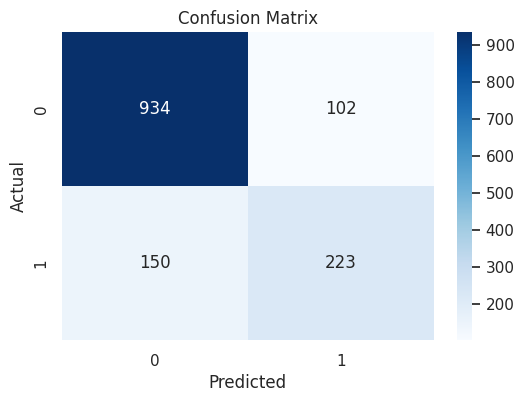

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

ROC AUC Score: 0.8622369497034376


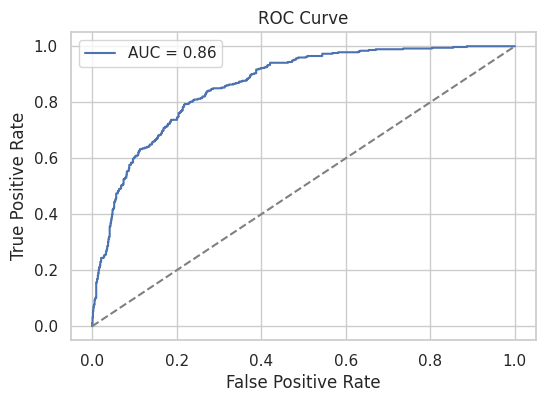

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC AUC Score
y_proba = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [19]:
# Phase 7: Model Deployment - Save, Load, and Predict

import joblib

# Step 1: Save the trained model
joblib.dump(model, 'churn_prediction_model.pkl')

# Step 2: Load the saved model
loaded_model = joblib.load('churn_prediction_model.pkl')

# Step 3: Predict using the loaded model (example: first row from test set)
sample = X_test.iloc[0].values.reshape(1, -1)  # reshape for a single prediction
prediction = loaded_model.predict(sample)

# Output result
print("Predicted Churn:", "Yes" if prediction[0] == 1 else "No")

Predicted Churn: Yes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


To write the final summary of your data analysis project, we should cover the following key points:

**1**. **Project** **Overview**:

Briefly describe the project and its objectives.

Explain the significance of the data and why it’s important to analyze it.

Mention the end goal, such as deriving insights or making predictions.


**2**. **Data** **Collection** & **Preparation**:

Explain how the data was gathered (e.g., sources, data collection methods).

Discuss the preprocessing steps, including cleaning, handling missing values, and any feature engineering done.


**3**. **Exploratory** **Data** **Analysis** (**EDA**):

Summarize the visualizations and statistical analyses performed during EDA.

Highlight any key patterns or insights uncovered in the data.


**4**. **Model** **Training** & **Evaluation**:

Describe the machine learning models used (e.g., regression, classification).

Provide details on the training process, including hyperparameter tuning and cross-validation.

Discuss the performance metrics (accuracy, precision, recall, etc.) and results.


**5**. **Results** **and** **Insights**:

Share the final predictions or insights derived from the model.

Highlight any actionable insights or findings that could be useful for decision-making.


**6**. **Challenges** & **Solutions**:

Mention any challenges faced during the project (e.g., data quality issues, model performance).

Explain how you overcame these challenges.


**7**. **Conclusion**:

Summarize the key takeaways from the project.

Reflect on how the project can be applied in a real-world context or the potential for future work.


**8**. **Future** **Recommendations**:

Suggest any improvements or next steps that could enhance the project, such as additional data collection or trying different models.